IMPORT THE NEEDED LIBRARIES TO OPEN THE DATA

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline
import tqdm
import cv2

In [2]:
project_name = 'Blood cell images'

In [3]:
#pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install jovian --upgrade --quiet

In [4]:
import os
from pathlib import Path

OPEN THE FILES AND EXAMINE THE DATA

In [5]:
val_ds = Path(r"C:\Users\USER-PC\Documents\Data Science\data set\Pictures\Blood cell images\dataset2-master\dataset2-master\images\TEST")
#test_ds = Path(r"C:\Users\USER-PC\Documents\Data Science\data set\Pictures\Blood cell images\dataset-master\dataset-master\JPEGImages")
train_ds = Path(r"C:\Users\USER-PC\Documents\Data Science\data set\Pictures\Blood cell images\dataset2-master\dataset2-master\images\TRAIN")

The data is an image data that comprises of 4 categories of blood cell.

Objective: Develop a deep neural network that is capable of identifying the blood cell images. 

Problem  type: Classification

In [6]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

Load the dataset using ImageFolder and resize the images in both the test and train folders

In [7]:
image_size = 32
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))

In [8]:
dataset = ImageFolder(train_ds, transform = T.Compose([T.Resize(image_size),
                                                       T.CenterCrop(image_size),
                                                       T.ToTensor(),
                                                       T.Normalize(*stats)]))
val = ImageFolder(val_ds, transform = T.Compose([T.Resize(image_size),
                                                 T.CenterCrop(image_size),
                                                 T.ToTensor(),
                                                 T.Normalize(*stats)]))

In [9]:
dataset.classes

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

Check the size the image in the dataset. 

In [10]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[ 1.4867,  1.4285,  1.0990,  ..., -2.4291, -2.4291, -2.4291],
         [ 1.2347,  1.1765,  1.1571,  ..., -2.4291, -2.4291, -2.4291],
         [ 1.1765,  1.2541,  1.1378,  ..., -2.4291, -2.4291, -2.4291],
         ...,
         [ 1.3510,  1.4479,  1.4285,  ...,  1.1765,  1.4091,  0.3430],
         [ 1.0602,  1.1378,  1.2541,  ...,  1.2928,  1.4479, -0.5100],
         [ 1.0602,  1.0214,  1.0021,  ...,  1.1571,  1.0796, -1.3823]],

        [[ 1.5348,  1.3381,  0.9644,  ..., -2.4183, -2.4183, -2.4183],
         [ 1.0431,  0.7678,  0.7481,  ..., -2.4183, -2.4183, -2.4183],
         [ 0.7284,  0.7481,  0.6891,  ..., -2.4183, -2.4183, -2.4183],
         ...,
         [ 1.2791,  1.3774,  1.3578,  ...,  0.8661,  1.2988,  0.2761],
         [ 0.7481,  0.8464,  1.0824,  ...,  1.1218,  1.4364, -0.5302],
         [ 0.5514,  0.4531,  0.5318,  ...,  0.8268,  0.8464, -1.4152]],

        [[ 1.4661,  1.2905,  0.9978,  ..., -2.2214, -2.2214, -2.2214],
         [ 1.0173,  0.9393,  0.9198,  ..., -2

View a sample image in the dataset

In [11]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  EOSINOPHIL (0)


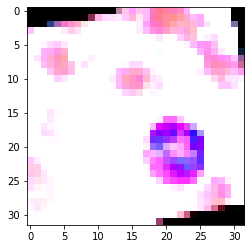

In [12]:
show_example(*dataset[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  MONOCYTE (2)


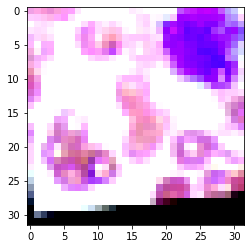

In [13]:
show_example(*dataset[5000])

In [14]:
import jovian

In [15]:
jovian.commit(project= project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vikthour/blood-cell-images" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/vikthour/blood-cell-images


'https://jovian.ai/vikthour/blood-cell-images'

Choose a random seed for the dataset and batch_size for the loading of the dataset

In [16]:
random_seed = 50
torch.manual_seed(random_seed)

In [17]:
from torch.utils.data.dataloader import DataLoader

batch_size = 200

Inspect the length of the dataset and validation set.

In [18]:
len(dataset)

9957

In [19]:
len(val)

2487

Using the Pytorch dataloader to define the dataset

In [20]:
train_loader = DataLoader(dataset, batch_size, shuffle = True, num_workers= 4, collate_fn=None, pin_memory=True)
val_loader = DataLoader(val, batch_size*2, num_workers = 4, collate_fn = None, pin_memory = True)

Load the images in 16 * 4 frid format

In [21]:
from torchvision.utils import make_grid

def show_batch(data):
    for image, label in data:
        fig, ax = plt.subplots(figsize = (12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        plt.imshow(make_grid(image, nrow = 16).permute(1, 2, 0))
        break

C:\Users\USER-PC\anaconda3.8\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 5000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


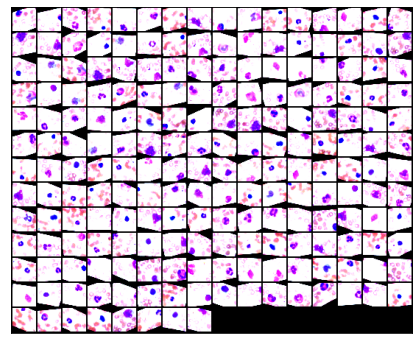

In [22]:
show_batch(train_loader)

In [23]:
jovian.commit(project= project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vikthour/blood-cell-images" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/vikthour/blood-cell-images


'https://jovian.ai/vikthour/blood-cell-images'

In [24]:
import torch.nn as nn
import torch.nn.functional as F

Define the accuracy metric using the maximum of all the predictions. This implies the predicted image will be the image with the highest probability among the four blood cells.

In [25]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

Define the image classification  using cross entropy as the loss function.

In [26]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

Define the evaluate function to load in the validation set. 

Define the fit function to determine the relationship between the trainset and the validation set using the model.

In [27]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [28]:
torch.cuda.is_available()

False

Determine whether to run the model on cpu or gpu

In [29]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [30]:
device = get_default_device()
device

device(type='cpu')

In [31]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Plot the losses and accuracies

In [32]:
def plot_losses(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');

In [33]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [34]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
#test_loader = DeviceDataLoader(test_loader, device)

Define the parameters of the input layer, output layer and the number of the hidden layers and their sizes of the Deep Neural Network.

In [35]:
input_size = 3*32*32
hidden_size1 = 512
hidden_size2 = 256 
hidden_size3 = 128
hidden_size4 = 64
hidden_size5 = 32
output_size = 4
batch_size = 128

In [36]:
class BloodCellModel(ImageClassificationBase):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size1)
        self.linear2 = nn.Linear(hidden_size1, hidden_size2)
        self.linear3 = nn.Linear(hidden_size2, hidden_size3)
        self.linear4 = nn.Linear(hidden_size3, hidden_size4)
        self.linear5 = nn.Linear(hidden_size4, output_size)
        #self.linear6 = nn.Linear(hidden_size5, output_size)
        #self.linear7 = nn.Linear(hidden_size6, output_size)
        
    def forward(self, xb):
        # Flatten images into vectors
        out = xb.view(xb.size(0), -1)
        # Apply layers & activation functions
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.linear4(out)
        out = F.relu(out)
        out = self.linear5(out)
        #out = F.relu(out)
        #out = self.linear6(out)
        #out = F.relu(out)
        #out = self.linear7(out)
        return out

In [37]:
model = to_device(BloodCellModel(input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, output_size), device)

Evaluate the model

In [38]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 1.392318606376648, 'val_acc': 0.2225000113248825}]

In [39]:
history += fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 1.3840, val_acc: 0.3181
Epoch [1], val_loss: 1.3823, val_acc: 0.2805
Epoch [2], val_loss: 1.3846, val_acc: 0.2713
Epoch [3], val_loss: 1.3819, val_acc: 0.2818
Epoch [4], val_loss: 1.3530, val_acc: 0.3800


In [40]:
history += fit(10, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 1.3744, val_acc: 0.2704
Epoch [1], val_loss: 1.3892, val_acc: 0.2471
Epoch [2], val_loss: 1.3756, val_acc: 0.3481
Epoch [3], val_loss: 1.3364, val_acc: 0.3281
Epoch [4], val_loss: 1.3738, val_acc: 0.2368
Epoch [5], val_loss: 1.3521, val_acc: 0.2774
Epoch [6], val_loss: 1.3346, val_acc: 0.3220
Epoch [7], val_loss: 1.3879, val_acc: 0.2824
Epoch [8], val_loss: 1.4290, val_acc: 0.3224
Epoch [9], val_loss: 1.3161, val_acc: 0.3784


In [41]:
#history += fit(10, 0.01, model, train_loader, val_loader)

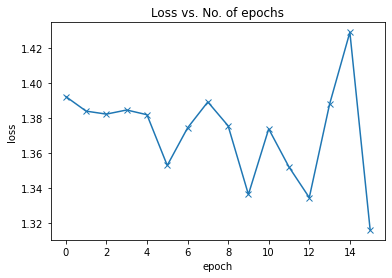

In [42]:
plot_losses(history)

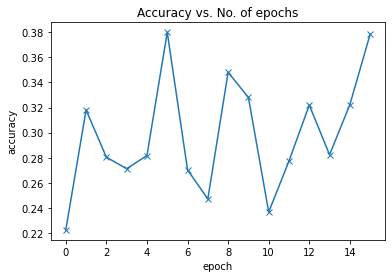

In [43]:
plot_accuracies(history)

Test the model with individual images to check for the 

In [44]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: EOSINOPHIL , Predicted: LYMPHOCYTE


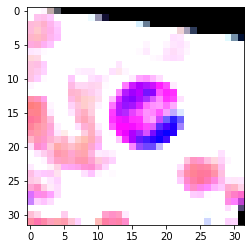

In [45]:
img, label = dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: EOSINOPHIL , Predicted: LYMPHOCYTE


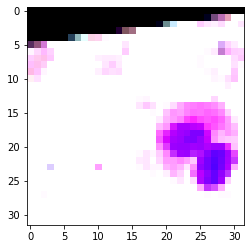

In [46]:
img, label = dataset[300]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: LYMPHOCYTE , Predicted: LYMPHOCYTE


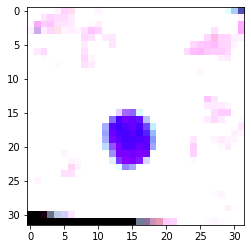

In [47]:
img, label = dataset[2600]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [64]:
val_loader = DataLoader(val, batch_size*3, shuffle = True, num_workers = 3, collate_fn = None, pin_memory = True)
result = evaluate(model, val_loader)
result

{'val_loss': 1.3169623613357544, 'val_acc': 0.39426594972610474}

In [58]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


In [50]:
torch.save(model.state_dict(), 'blood_cell.pth')

In [51]:
jovian.commit(project= project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vikthour/blood-cell-images" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/vikthour/blood-cell-images


'https://jovian.ai/vikthour/blood-cell-images'

# CONCLUSION

The learning had a 37% accuracy until i used the test set as the validation set to have a better accuracy of 40%. 
* More images, say tens of thousands, will be needed to help the accuracy of the model to the near perfect range.
* I trained the model on a cpu which crashed many times even after resizing the image. A better accuracy would be gotten if the training were on a gpu and the learning rate set much lower.
* Increasing the batch size increased the accuracy.

In [53]:
jovian.submit(assignment="zerotogans-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vikthour/blood-cell-images" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/vikthour/blood-cell-images
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/deep-learning-with-pytorch-zero-to-gans/assignment/course-project
